# Declare and read data

In [4]:
import chardet

with open('atm_transactions.csv', 'rb') as f:
    df = chardet.detect(f.read(10000))  # Đọc một phần tệp
    print(df)

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [6]:
import pandas as pd
df=pd.read_csv('atm_transactions.csv', encoding='utf-8')

# EDA

## Basic EDA

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

def dataoverview(df, message):
    print(f'{message}:')
    print('\nInfo: ')
    print(df.info())
    print('\nDescribe: ')
    print(df.describe())
    print('\nRows: ', df.shape[0])
    print('\nNumber of features: ', df.shape[1])
    print('\nFeatures: ')
    print(df.columns.tolist())
    print('\nMissing values: ', df.isnull().sum().values.sum())
    print('\nUnique values: ')
    print(df.nunique())
    dups = df.duplicated()
    print("Duplicate Rows",df[dups])
    plt.figure(figsize=(10,12))
    sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

A Overview about the dataset:

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30156 entries, 0 to 30155
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   atmId                     30156 non-null  object
 1   atmName                   30156 non-null  object
 2   atmCity                   30156 non-null  object
 3   atmAddress                30156 non-null  object
 4   totalBalance              30156 non-null  int64 
 5   numberIncomeTransaction   30156 non-null  int64 
 6   numberOutcomeTransaction  30156 non-null  int64 
 7   totalIncome               30156 non-null  int64 
 8   totalOutcome              30156 non-null  int64 
 9   totalNumberTransaction    30156 non-null  int64 
 10  day                       30156 non-null  object
 11  transactionTime           30156 non-null  object
dtypes: int64(6), object(6)
memory usage: 2.8+ MB
None

Describe: 
       totalBalance  numberInc

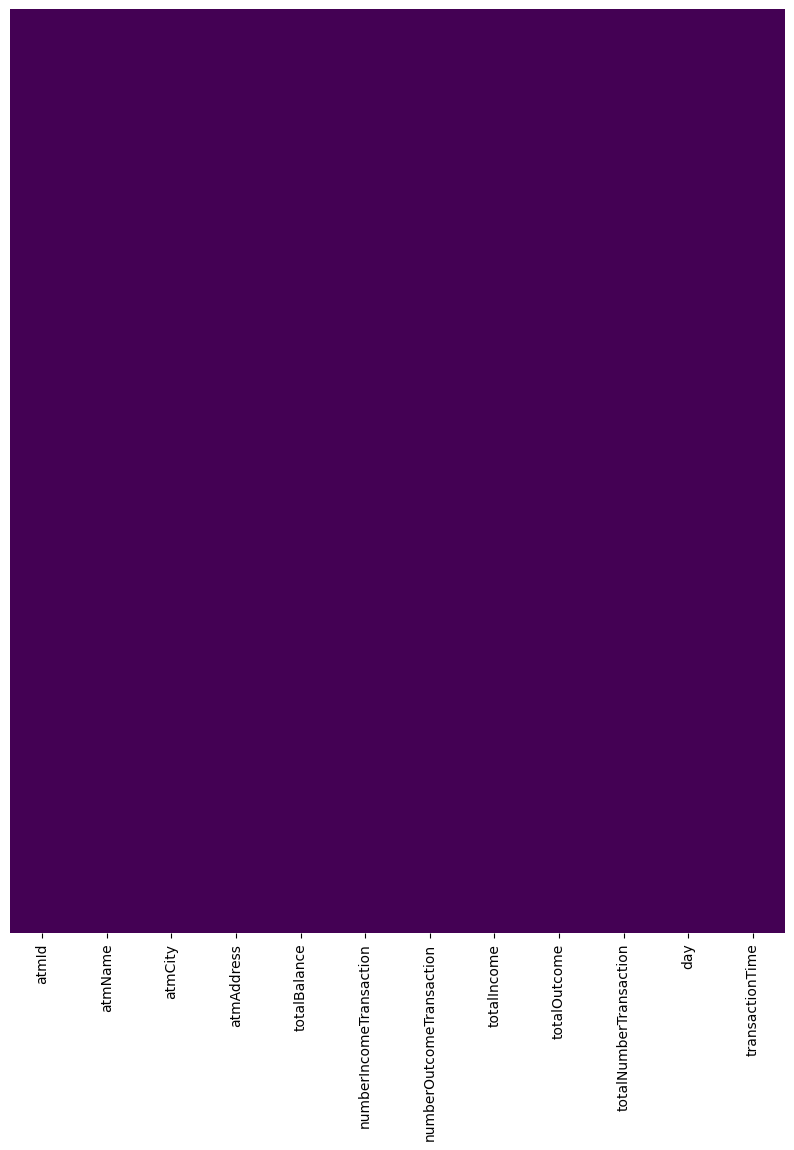

In [14]:
dataoverview(df, 'A Overview about the dataset')

## Plot charts to understand the data

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
def eda_dataset(df):
    #Separating columns to be visualized
    out_cols=list(set(df.nunique()[df.nunique()<6].keys().tolist()
                      + df.select_dtypes(include='object').columns.tolist()))
    viz_cols=[x for x in df.columns if x not in out_cols]
    sns.pairplot(df[viz_cols], diag_kind='kde')
    plt.show()

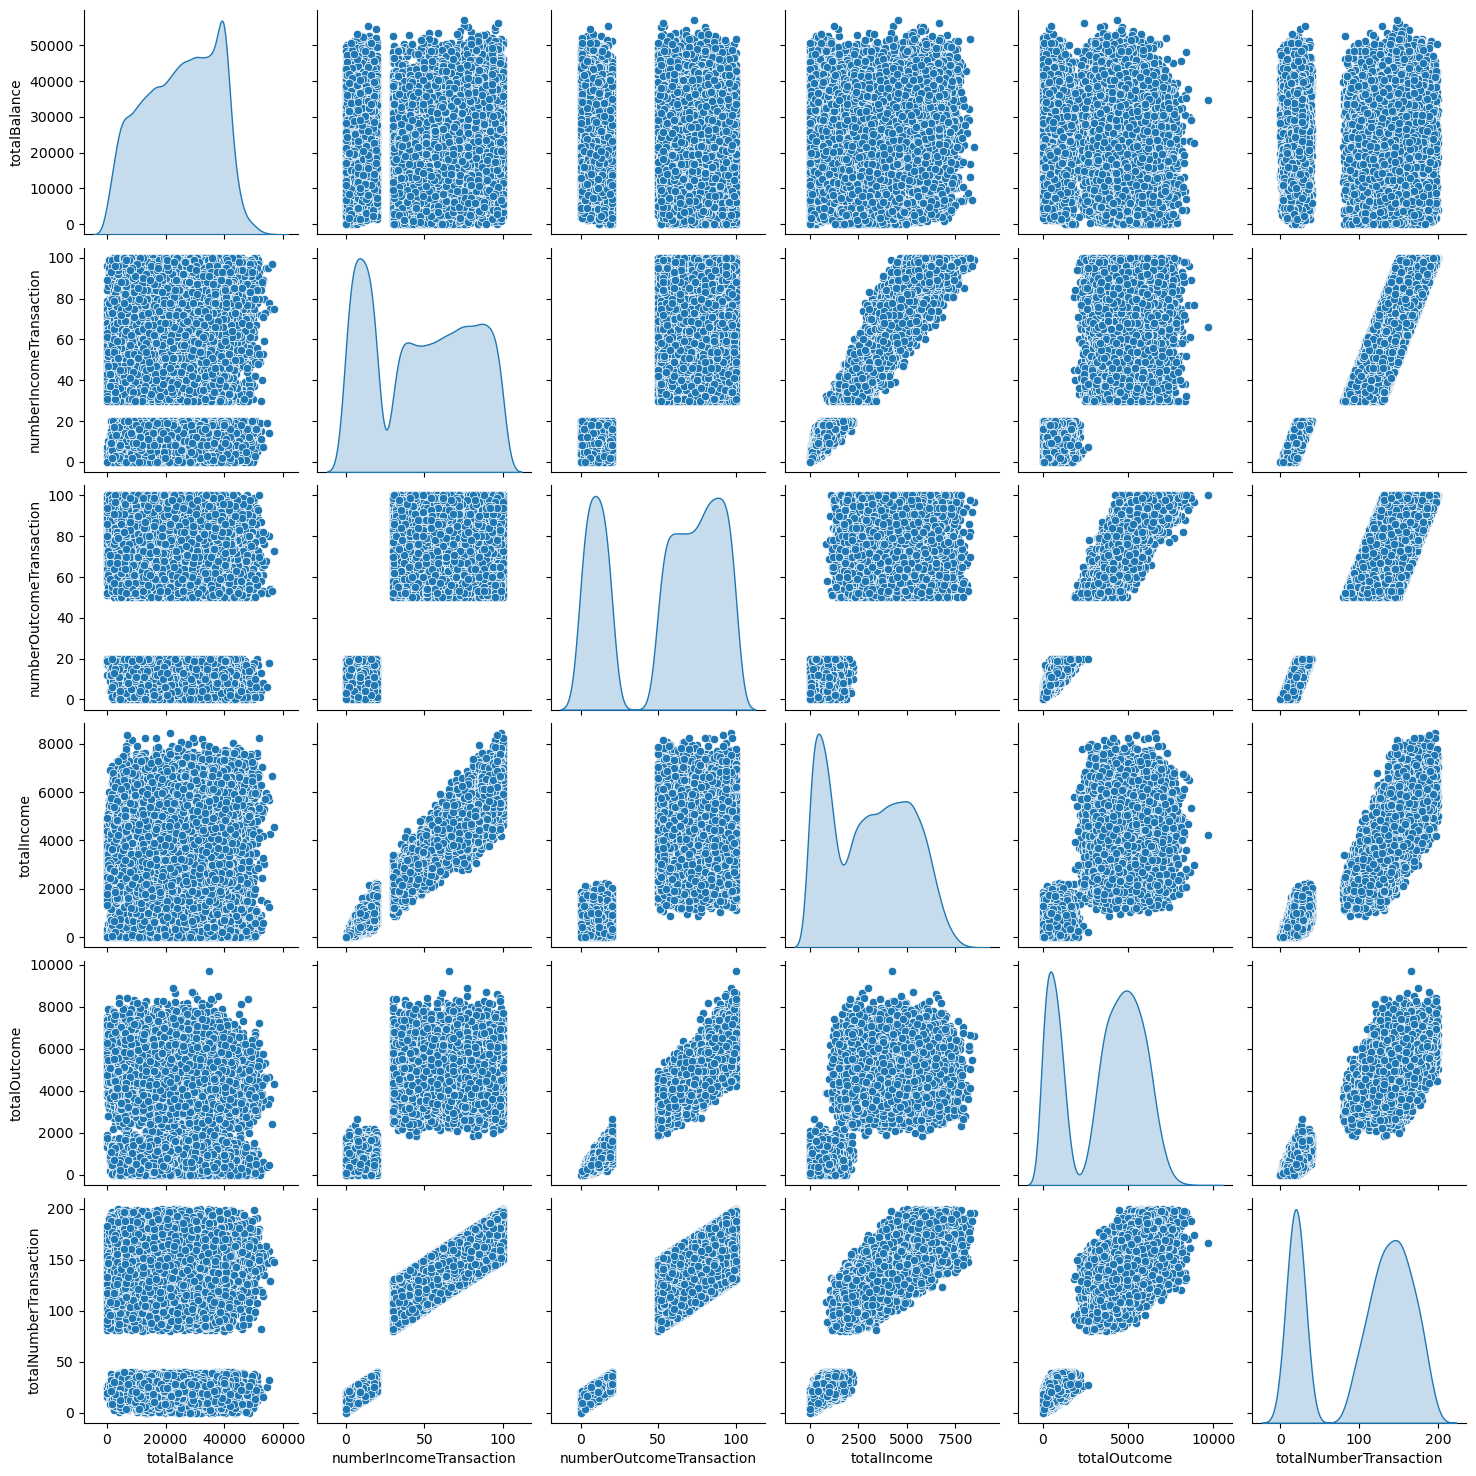

In [22]:
eda_dataset(df)

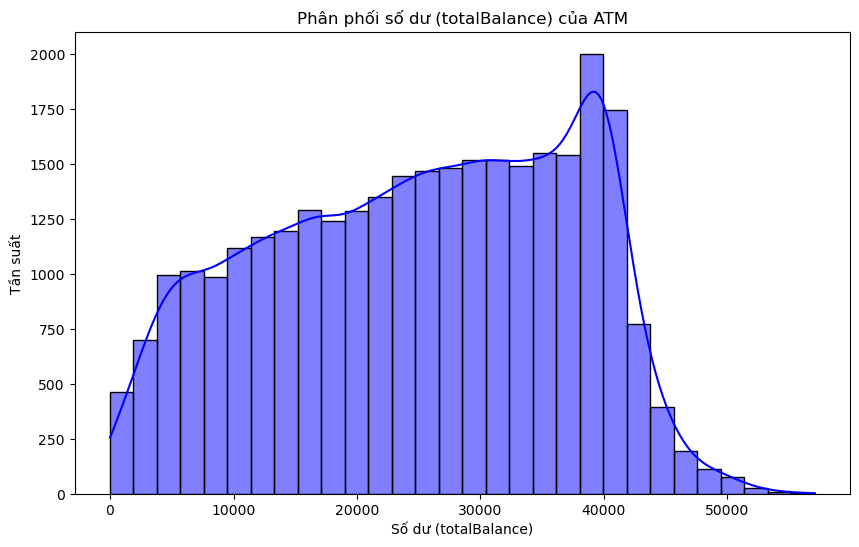

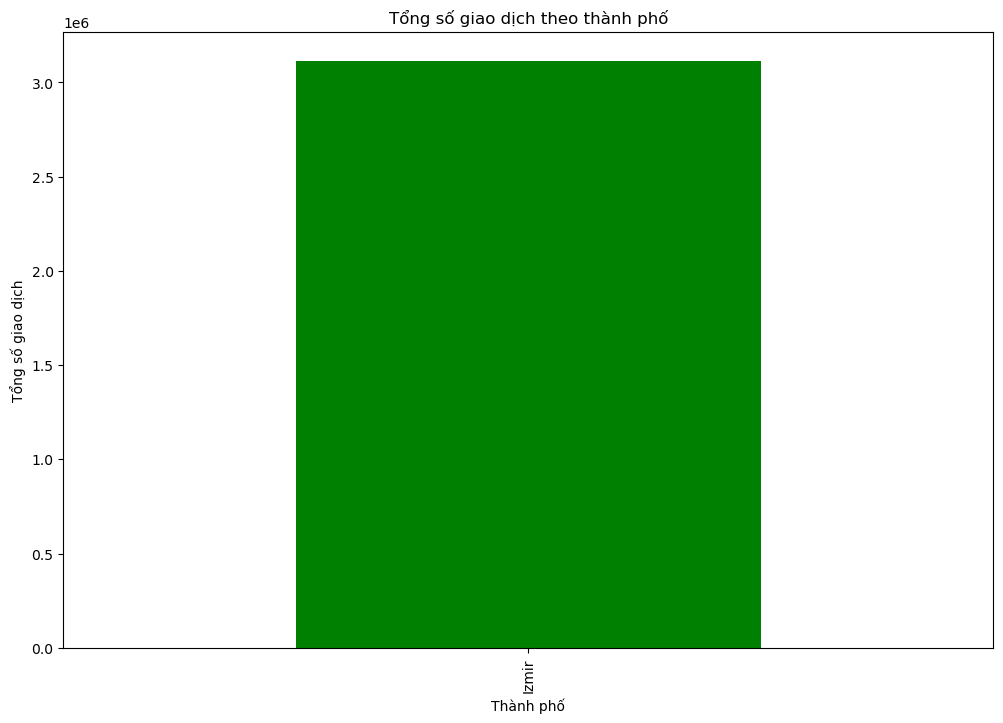

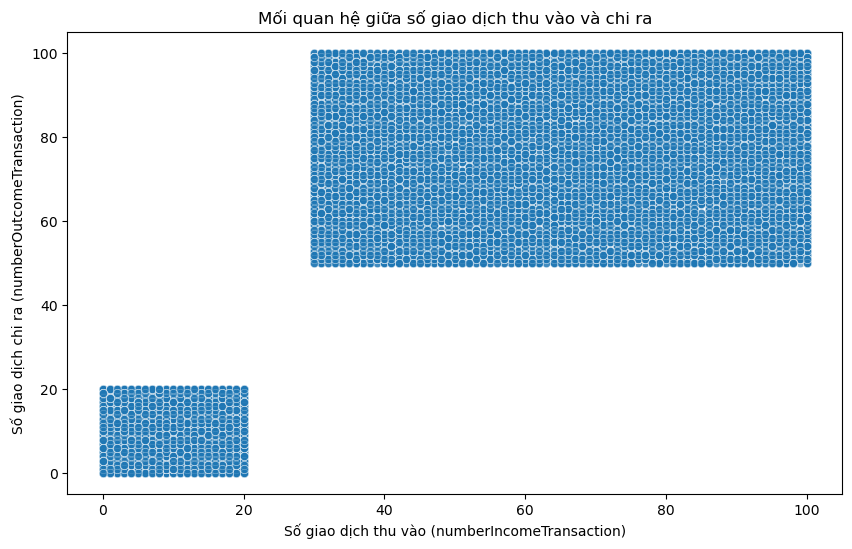

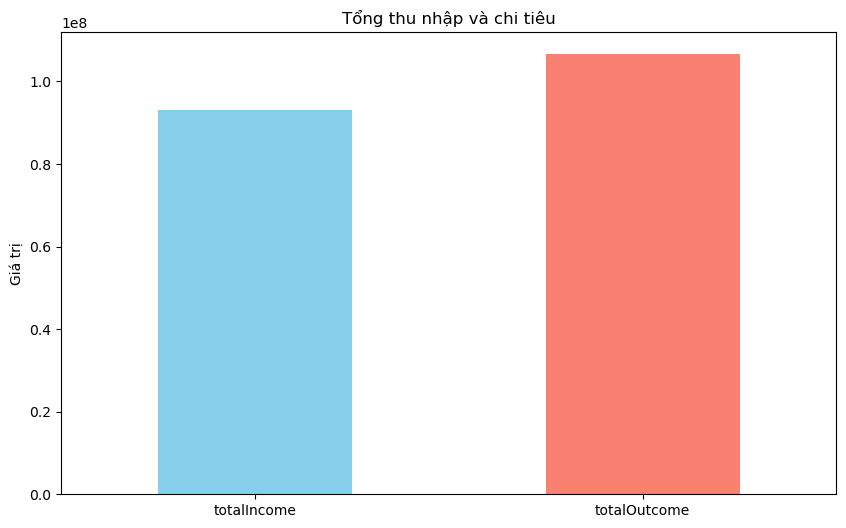

C:\Users\thanh\AppData\Local\Temp\ipykernel_124892\522110890.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['day'], order=df['day'].value_counts().index, palette='viridis')


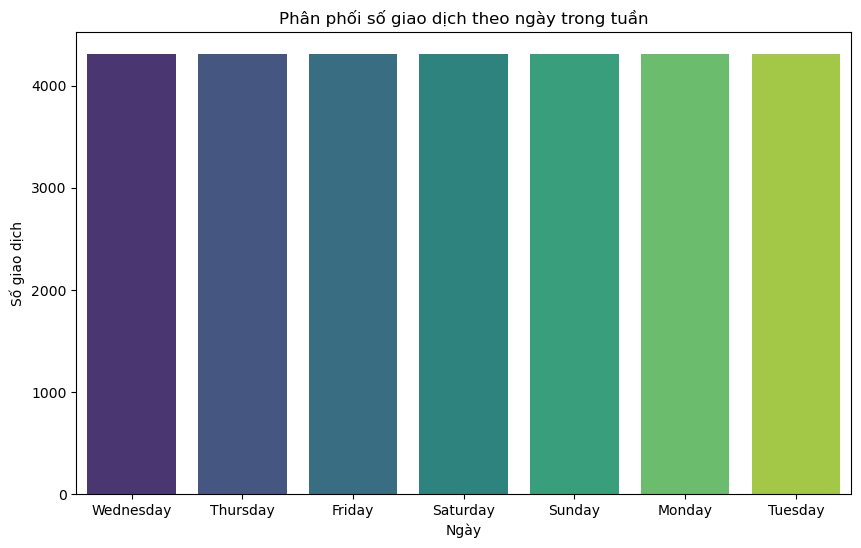

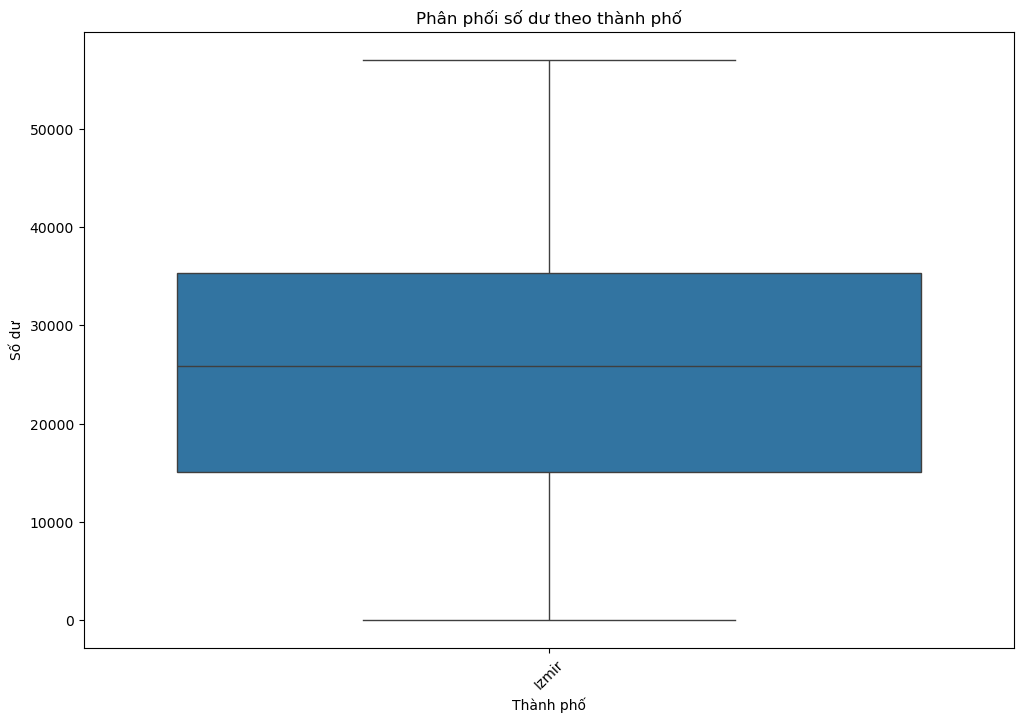

In [26]:
# 1. Distribution of ATM balances (totalBalance)
plt.figure(figsize=(10, 6))
sns.histplot(df['totalBalance'], bins=30, kde=True, color='blue')
plt.title('Distribution of ATM Balances (totalBalance)')
plt.xlabel('Balance (totalBalance)')
plt.ylabel('Frequency')
plt.show()

# 2. Total number of transactions by city (atmCity)
plt.figure(figsize=(12, 8))
city_transactions = df.groupby('atmCity')['totalNumberTransaction'].sum().sort_values(ascending=False)
city_transactions.plot(kind='bar', color='green')
plt.title('Total Number of Transactions by City')
plt.xlabel('City')
plt.ylabel('Total Transactions')
plt.show()

# 3. Relationship between the number of income and outcome transactions
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df['numberIncomeTransaction'], 
    y=df['numberOutcomeTransaction'], 
    alpha=0.6
)
plt.title('Relationship Between Number of Income and Outcome Transactions')
plt.xlabel('Number of Income Transactions (numberIncomeTransaction)')
plt.ylabel('Number of Outcome Transactions (numberOutcomeTransaction)')
plt.show()

# 4. Total income and outcome amounts (totalIncome, totalOutcome)
plt.figure(figsize=(10, 6))
income_outcome = df[['totalIncome', 'totalOutcome']].sum()
income_outcome.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Total Income and Outcome')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.show()

# 5. Distribution of transactions by day of the week (day)
plt.figure(figsize=(10, 6))
sns.countplot(x=df['day'], order=df['day'].value_counts().index, palette='viridis')
plt.title('Distribution of Transactions by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Transactions')
plt.show()

# 6. Boxplot of balance distribution by city
plt.figure(figsize=(12, 8))
sns.boxplot(x='atmCity', y='totalBalance', data=df)
plt.title('Balance Distribution by City')
plt.xlabel('City')
plt.ylabel('Balance')
plt.xticks(rotation=45)
plt.show()